<a href="https://colab.research.google.com/github/Diegorh1/MelIA2025/blob/main/ProyectoF%2CDiegoRodriguezHernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Final -MelA 2025 Semana 1
##Titulo: Optimización de Regresión Lineal con Descenso del Gradiente
by Diego Rodriguez Hernandez

##Objetivo del proyecto
Este proyecto tiene como objetivo implementar desde cero el algoritmo de descenso del gradiente para resolver una tarea de regresión lineal utilizando el subconjunto de datos iris

##Cargar el subconjunto de datos iris

In [ ]:
from sklearn.datasets import load_iris
import pandas as pd

# Cargar los datos como DataFrame
iris = load_iris(as_frame=True)
df = iris.frame

# Renombrar columnas
df.columns = [col.lower().replace(" (cm)", "").replace(" ", "_") for col in df.columns]

# Extracción de variables
X = df[['sepal_width', 'petal_width', 'sepal_length']].values  # variables independientes
y = df['petal_length'].values  # variable dependiente



##Función de costo
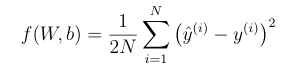

In [ ]:
import numpy as np

def costo(W, b, X, y):
    m = X.shape[0]  # Número de muestras
    y_pred = np.dot(X, W) + b  # Predicciones
    return (1/(2*m)) * np.sum((y_pred - y)**2)

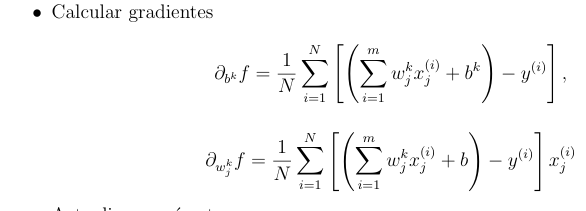

##Función  de Descenso del gradiente desde  0


In [ ]:
import numpy as np

def descGrad(X, y, lr=0.01, epochs=100000):
    m, n = X.shape
    W = np.zeros(n)  # Inicializar pesos
    b = 0  # sesgo
    costs = []

    for _ in range(epochs):
        y_pred = np.dot(X, W) + b
        error = y_pred - y

        # Cálculo de gradientes
        dW = (1/m) * np.dot(X.T, error)
        db = (1/m) * np.sum(error)

        # Actualización de parámetros
        W -= lr * dW
        b -= lr * db

        # Guardar costo actual
        costs.append(costo(W, b, X, y))

    return W, b, costs

In [ ]:
lr = 0.01
epochs = 100000
W,b, costs = descGrad(x, y, lr, epochs)

#Evolución de costo a traves de las iteraciones

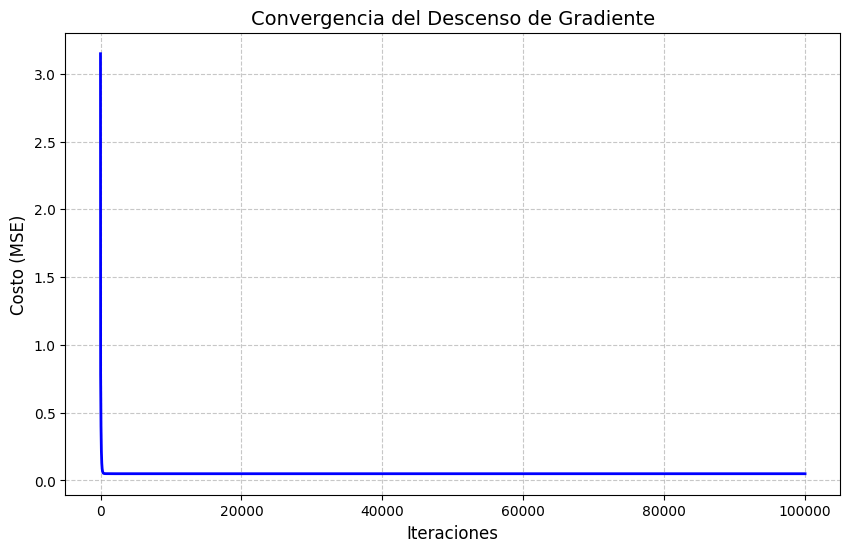

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(costs, color='blue', linewidth=2)
plt.title('Convergencia del Descenso de Gradiente', fontsize=14)
plt.xlabel('Iteraciones', fontsize=12)
plt.ylabel('Costo (MSE)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

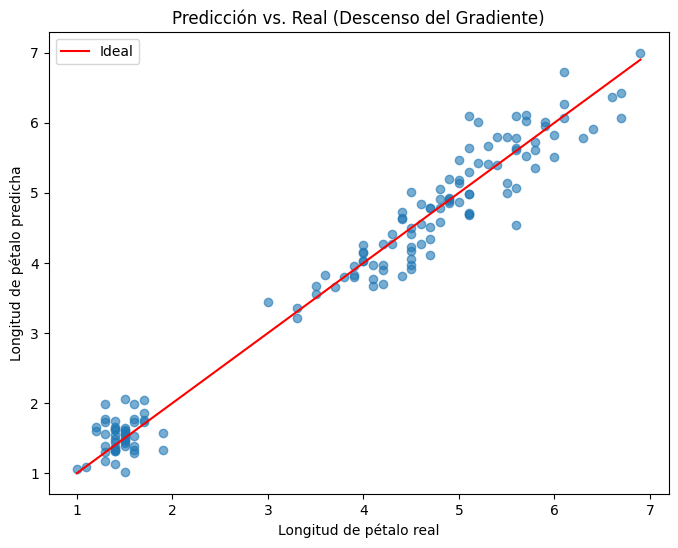

In [ ]:
y_pred = X @ W + b
plt.figure(figsize=(8,6))
plt.scatter(y, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '-r', label="Ideal")
plt.xlabel("Longitud de pétalo real")
plt.ylabel("Longitud de pétalo predicha")
plt.title("Predicción vs. Real (Descenso del Gradiente)")
plt.legend()
plt.show()

##USO DEL LinearRegression de sklearn para comparación de mi modelo y el sklearn

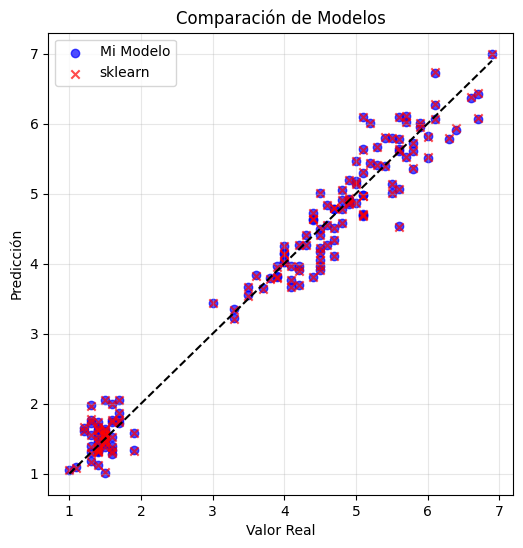

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

sk_model = LinearRegression()
sk_model.fit(X, y)  # mis datos origin
y_pred_gd = X @ W + b
y_pred_sk = sk_model.predict(X)
plt.figure(figsize=(6,6))

plt.scatter(y, y_pred_gd, alpha=0.7, label='Mi Modelo', color='blue')

plt.scatter(y, y_pred_sk, alpha=0.7, label='sklearn', color='red', marker='x')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', label='')

plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Comparación de Modelos')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()